In [1]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
import math


In [2]:
data = pd.read_csv('measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
data.shape

(388, 12)

In [4]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [5]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [53]:
def clean_data(data):
    
    data = data.drop_duplicates()
    data = data.drop(1071, axis = 0)
    return data

In [54]:
data['refill_liters']=pd.to_numeric(data['refill_liters'], errors='coerce')

In [55]:
data['refill_liters'] = data['refill_liters'].fillna(data['refill_liters'].mean())

In [56]:
data['refill_gas'] = data['refill_gas'].fillna(data['refill_gas'].mode()[0])

In [59]:
data['specials'] = data['specials'].fillna(data['specials'].mode()[0])

In [60]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,rain,E10,0,0,0,45.00,E10
1,12,"4,2",30,"21,5",13,rain,E10,0,0,0,36.75,SP98
2,"11,2","5,5",38,"21,5",15,rain,E10,0,0,0,36.75,SP98
3,"12,9","3,9",36,"21,5",14,rain,E10,0,0,0,36.75,SP98
4,"18,5","4,5",46,"21,5",15,rain,E10,0,0,0,36.75,SP98
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,rain,SP98,0,0,0,36.75,SP98
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,36.75,SP98
385,16,"3,8",45,25,19,rain,SP98,0,0,0,36.75,SP98
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,36.75,SP98


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    object 
 1   consume        388 non-null    object 
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    object 
 4   temp_outside   388 non-null    int64  
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  388 non-null    float64
 11  refill_gas     388 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 36.5+ KB


In [62]:
data['distance'].value_counts() 

11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
44,9     1
36,6     1
9,9      1
16,8     1
14,7     1
Name: distance, Length: 174, dtype: int64

In [63]:
data['consume'].value_counts() 

5       27
4,5     27
4,6     22
4,7     21
4,3     20
4,1     20
5,1     19
4,8     19
4,4     17
4       17
4,9     16
4,2     15
5,3     14
3,9     14
5,2     12
3,8     11
5,7     11
5,6     10
5,4      9
3,7      8
5,8      7
5,5      6
5,9      5
3,6      4
6,4      4
6,1      4
6,2      4
6        4
6,3      4
8,1      2
6,5      2
7,4      2
6,9      1
8,7      1
12,2     1
7,9      1
10,8     1
9,9      1
7,1      1
3,3      1
9        1
11,5     1
6,6      1
Name: consume, dtype: int64

In [64]:
data['speed'].value_counts() 

42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     4
27     4
62     4
59     3
60     3
54     3
75     3
23     3
31     3
80     3
69     2
16     2
18     2
71     2
20     2
82     2
63     2
14     1
73     1
66     1
85     1
67     1
88     1
65     1
90     1
87     1
Name: speed, dtype: int64

In [65]:
data['temp_inside'].value_counts() 

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [66]:
data['temp_outside'].value_counts() 

 8     31
 10    31
 7     28
 6     21
 9     20
 11    20
 18    19
 12    17
 4     17
 17    16
 16    16
 15    14
 13    14
 14    13
 3     13
 5     13
 1     12
 0      9
 21     9
 2      7
 23     7
 24     7
 19     5
 27     5
 26     4
 31     3
 25     3
 20     3
 30     3
 22     3
-3      2
 28     2
-5      1
Name: temp_outside, dtype: int64

In [67]:
data['specials'].value_counts() 

rain                  327
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [68]:
data['gas_type'].value_counts() 

SP98    228
E10     160
Name: gas_type, dtype: int64

In [69]:
data['ac'].value_counts()

0    358
1     30
Name: ac, dtype: int64

In [70]:
data['rain'].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [71]:
data['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [72]:
data['ac'].value_counts()

0    358
1     30
Name: ac, dtype: int64

In [73]:
data['refill_liters'].value_counts()

36.75    380
45.00      2
39.00      2
38.00      1
10.00      1
41.00      1
37.00      1
Name: refill_liters, dtype: int64

In [74]:
data['refill_gas'].value_counts()

SP98    383
E10       5
Name: refill_gas, dtype: int64

# Scaling
X-Y Split

In [75]:
y = data['refill_liters']
X = data.drop(['refill_liters'], axis=1)

In [76]:
X.shape

(388, 11)

In [77]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [78]:
X_num 

,speed,temp_outside,ac,rain,sun
0,26,12,0,0,0
1,30,13,0,0,0
2,38,15,0,0,0
3,36,14,0,0,0
4,46,15,0,0,0
...,...,...,...,...,...
383,39,18,0,0,0
384,38,31,1,0,0
385,45,19,0,0,0
386,42,31,1,0,0


In [79]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
ac,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


In [80]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,speed,temp_outside,ac,rain,sun
0,0.157895,0.472222,0.0,0.0,0.0
1,0.210526,0.500000,0.0,0.0,0.0
2,0.315789,0.555556,0.0,0.0,0.0
3,0.289474,0.527778,0.0,0.0,0.0
4,0.421053,0.555556,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>


In [81]:
X_cat = data.select_dtypes(include = object)
X_cat.head()

,distance,consume,temp_inside,specials,gas_type,refill_gas
0,28,5,"21,5",rain,E10,E10
1,12,"4,2","21,5",rain,E10,SP98
2,"11,2","5,5","21,5",rain,E10,SP98
3,"12,9","3,9","21,5",rain,E10,SP98
4,"18,5","4,5","21,5",rain,E10,SP98


In [82]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,"distance_1,7","distance_10,1","distance_10,2","distance_10,5","distance_10,6","distance_10,8","distance_100,9","distance_101,9","distance_11,2","distance_11,3",...,specials_AC sun,specials_ac,specials_ac rain,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_SP98,refill_gas_SP98
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [83]:
X = pd.concat([X_normalized,X_cat_encode], axis=1)

In [84]:
X

,speed,temp_outside,ac,rain,sun,"distance_1,7","distance_10,1","distance_10,2","distance_10,5","distance_10,6",...,specials_AC sun,specials_ac,specials_ac rain,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_SP98,refill_gas_SP98
0,0.157895,0.472222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.210526,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.315789,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.289474,0.527778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.421053,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.328947,0.638889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
384,0.315789,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
385,0.407895,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
386,0.368421,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [85]:
X.isna().sum()

speed              0
temp_outside       0
ac                 0
rain               0
sun                0
                  ..
specials_snow      0
specials_sun       0
specials_sun ac    0
gas_type_SP98      0
refill_gas_SP98    0
Length: 246, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(310, 246)
(78, 246)
(310,)
(78,)


In [88]:
X_train.head()

,speed,temp_outside,ac,rain,sun,"distance_1,7","distance_10,1","distance_10,2","distance_10,5","distance_10,6",...,specials_AC sun,specials_ac,specials_ac rain,specials_half rain half sun,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_SP98,refill_gas_SP98
63,0.157895,0.305556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
238,0.342105,0.194444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
132,0.250000,0.305556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
101,0.750000,0.361111,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
351,0.421053,0.611111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [89]:
y_train

63     36.75
238    36.75
132    36.75
101    36.75
351    36.75
       ...  
71     36.75
106    45.00
270    36.75
348    36.75
102    36.75
Name: refill_liters, Length: 310, dtype: float64

In [90]:
correlations_matrix = data.corr()
correlations_matrix

C:\Users\sanch\AppData\Local\Temp\ipykernel_12736\3143150681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = data.corr()


,speed,temp_outside,ac,rain,sun,refill_liters
speed,1.000000,0.015411,-3.540800e-02,0.009489,8.161828e-02,8.844798e-03
temp_outside,0.015411,1.000000,1.675623e-01,-0.186315,3.469034e-01,-1.138711e-02
ac,-0.035408,0.167562,1.000000e+00,0.242915,8.859801e-02,-1.122830e-15
rain,0.009489,-0.186315,2.429147e-01,1.000000,-1.126500e-01,-1.103579e-01
sun,0.081618,0.346903,8.859801e-02,-0.112650,1.000000e+00,-1.519794e-15
refill_liters,0.008845,-0.011387,-1.122830e-15,-0.110358,-1.519794e-15,1.000000e+00


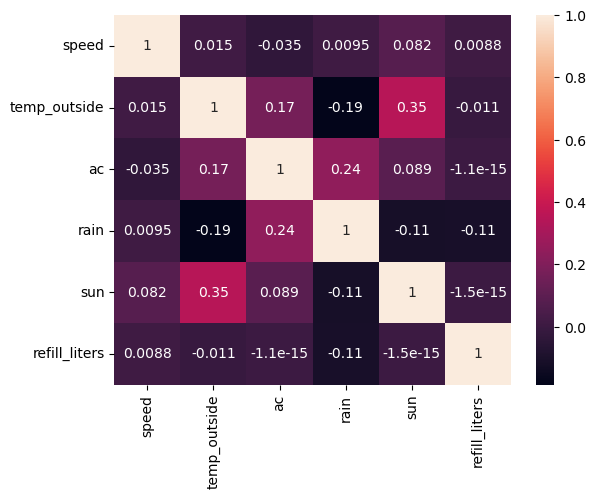

In [91]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Predictions

In [92]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [93]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9872815440345108

In [94]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

-4.000294815375352e+25

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=5)
model = regr.fit(X_train, y_train)

In [96]:
print("test data R2 score was: ",regr.score(X_test, y_test))
print("train data R2 score was: ",regr.score(X_train, y_train))

test data R2 score was:  0.45960038493606403
train data R2 score was:  0.9952448956812092


In [97]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error', # was: criterion = 'mse',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = None)
model = regr.fit(X_train, y_train)
print("test data R2 score was: ",regr.score(X_test, y_test))
print("train data R2 score was: ",regr.score(X_train, y_train))

test data R2 score was:  0.4596011609399864
train data R2 score was:  1.0


In [98]:
y_pred = model.predict(X_test)
y_pred

array([36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75,
       36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75,
       36.75, 39.  , 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75,
       36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75,
       36.75, 36.75, 36.75, 39.  , 36.75, 36.75, 36.75, 36.75, 36.75,
       36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75,
       36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75,
       36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75, 36.75,
       36.75, 36.75, 36.75, 36.75, 36.75, 36.75])

In [99]:
y_test

271    36.75
46     36.75
167    36.75
42     36.75
349    36.75
       ...  
3      36.75
18     36.75
93     36.75
108    36.75
255    36.75
Name: refill_liters, Length: 78, dtype: float64

# Metrics

In [100]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

3.511435644561481e+25

In [101]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

5925736785043.258

In [102]:
y_test.mean()

36.87179487179487

In [103]:
from sklearn.metrics import mean_absolute_error, r2_score

In [104]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

2217220328112.9453


In [105]:
rmse = math.sqrt(mse)
print(rmse)

5925736785043.258


In [106]:
import seaborn.objects as so

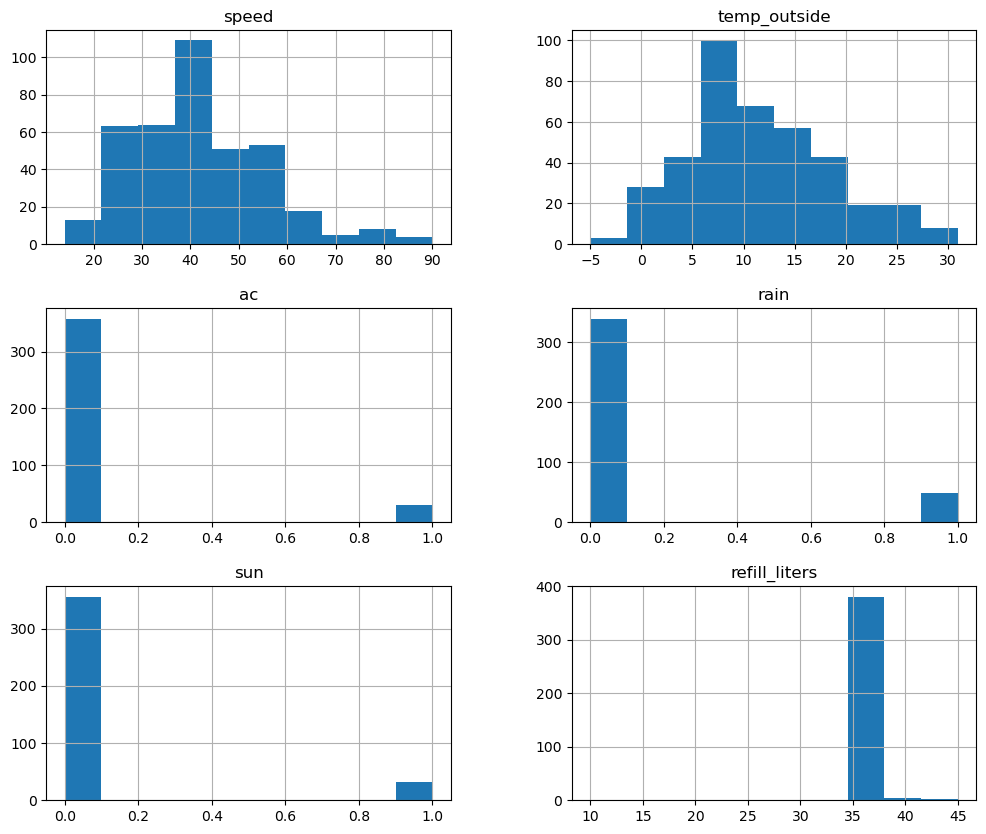

In [107]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 10))
plt.show()


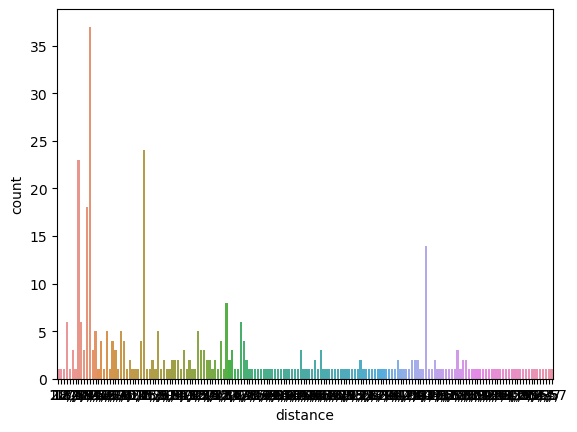

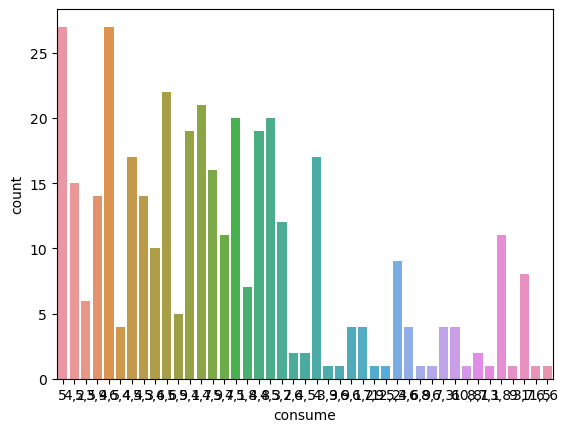

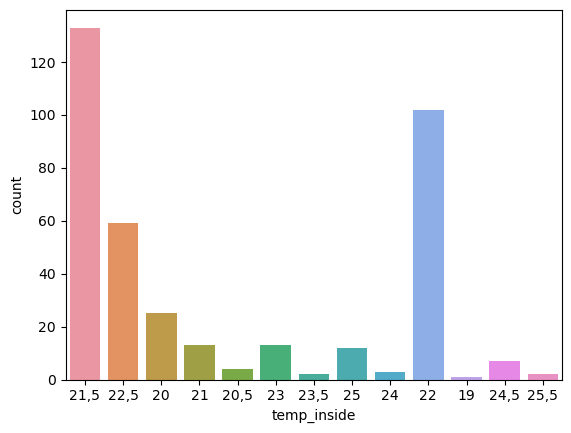

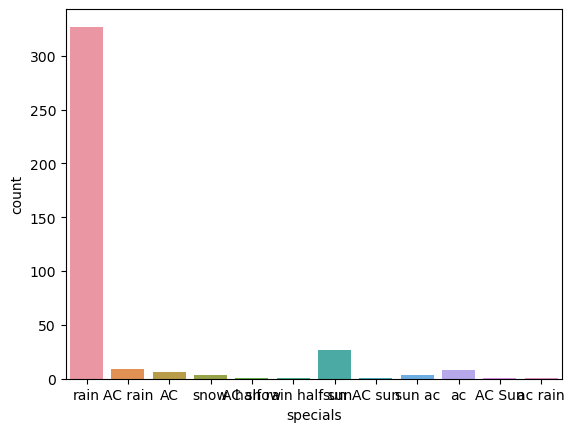

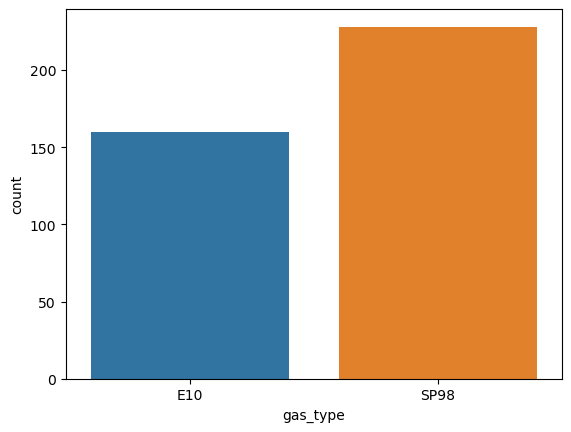

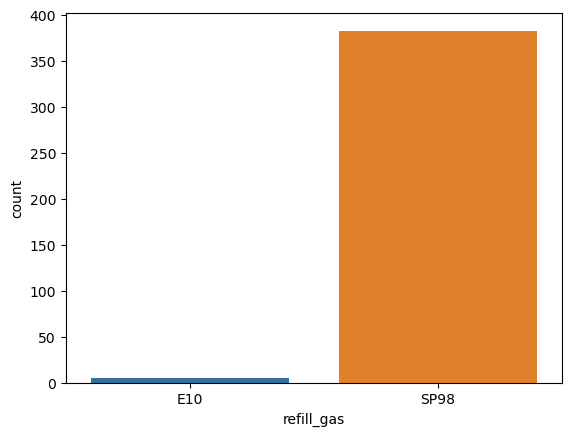

In [108]:
for c in X_cat.columns:
    sns.countplot(x=c, data=X_cat)
    plt.show()

Text(0.5, 1.0, 'speed & consume')

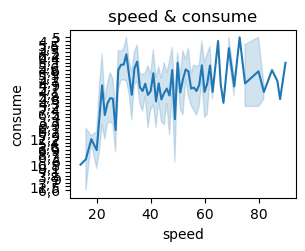

In [109]:
ax3=plt.subplot(2,2,3)
sns.lineplot(x=data['speed'], y=data['consume'],ax=ax3)
plt.title("speed & consume")

In this graph we can see that at higher speeds fuel consumption increases.

Conclusions.

I will need more time to analyze more features like ac and rain, gas type and consume, etc.

Related to the predictions and metrics. I have tried with different ones lineal regression and DecisionTreeRegressor.
The R2 scored on our (X_test, y_test))regr.score(X_train, y_train) we could interpretate there are relationship between our X_train/test,Y_train/test axis.
I really consider that to explain the results of this data analysis, the best option is make more comparation between the variables and focus on them to interpetate the dataset.